<a href="https://colab.research.google.com/github/Vikashkrishna/ML_LAB/blob/main/2348571_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', 0.0).astype(float)

df.isna().sum()



missing_values= np.where(df['TotalCharges']==0.0)[0]

missing_values

df.drop(index=missing_values, inplace=True)


NameError: ignored

In [ ]:
empty_string_count = (df['TotalCharges'] == 0.0).sum()
empty_string_count

In [ ]:
df1 = df.drop(['customerID'], axis=1)

nd = df1[['tenure', 'MonthlyCharges', 'TotalCharges']]

nd.head()

cd = df1[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder


In [ ]:
X = cd.drop('Churn', axis=1)
X_encoded = pd.get_dummies(X)
Y = cd['Churn']


In [ ]:
Y_encoded = pd.get_dummies(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state = 42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)


In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print(report)


Accuracy: 0.77
              precision    recall  f1-score   support

          No       0.83      0.87      0.84      1033
         Yes       0.57      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [ ]:
from sklearn.metrics import roc_auc_score, cohen_kappa_score, matthews_corrcoef

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(Y_test, y_prob)
print("ROC AUC:", roc_auc)

kappa_score = cohen_kappa_score(Y_test, Y_pred)
print("Cohen's Kappa Score:", kappa_score)


mcc = matthews_corrcoef(Y_test, Y_pred)
print("Matthews Correlation Coefficient:", mcc)


ROC AUC: 0.8143186606685269
Cohen's Kappa Score: 0.37613250168303747
Matthews Correlation Coefficient: 0.3778450629742105


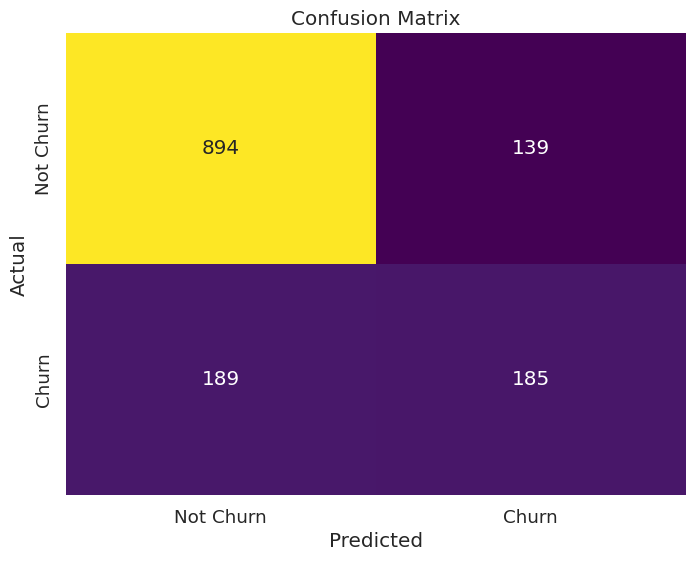

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

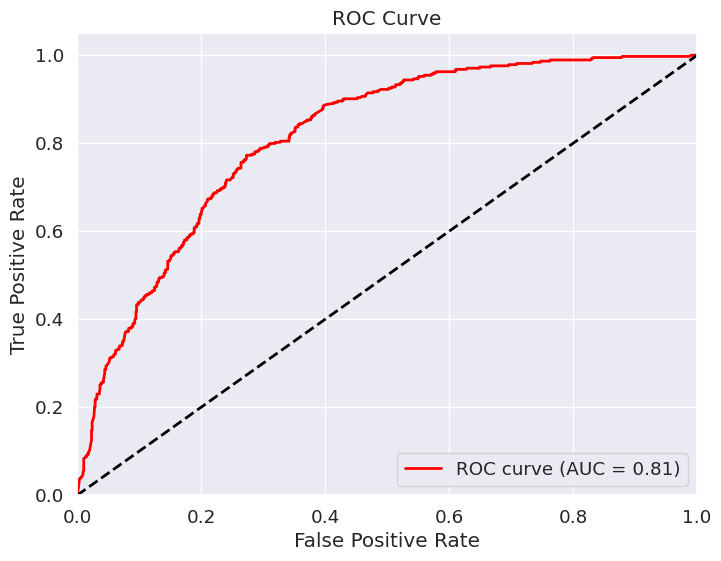

In [ ]:
from sklearn.metrics import roc_curve

Y_test_binary = Y_test.map({'No': 0, 'Yes': 1})
fpr, tpr, thresholds = roc_curve(Y_test_binary, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

AUC-PR: 0.5764999900249748


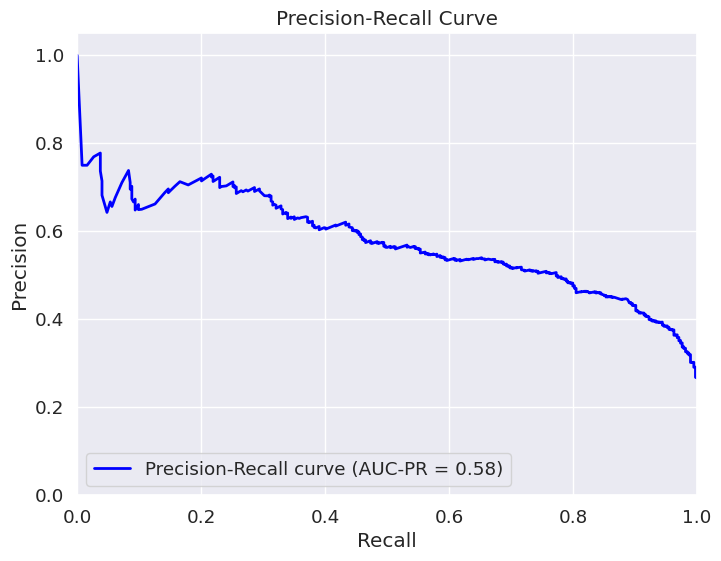

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, thresholds = precision_recall_curve(Y_test_binary, y_prob)

pr_auc = auc(recall, precision)
print("AUC-PR:", pr_auc)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AUC-PR = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

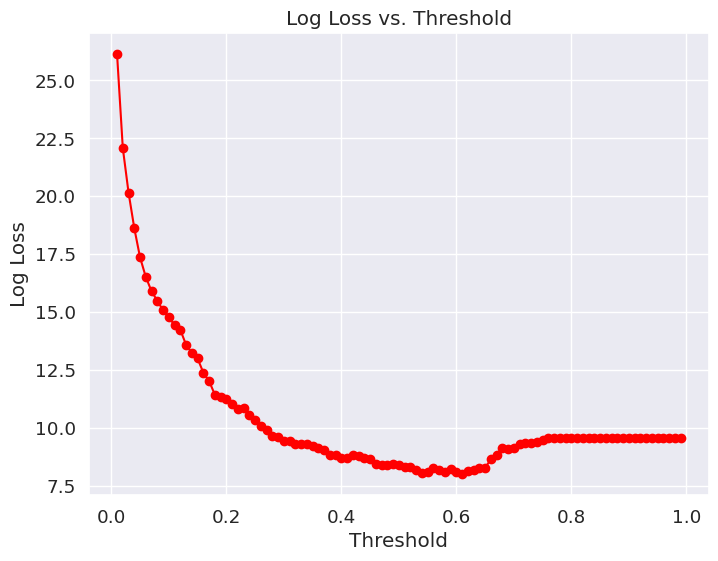

In [ ]:
from sklearn.metrics import log_loss

log_loss_values = []

thresholds = np.arange(0.01, 1, 0.01)

for threshold in thresholds:
   y_pred_threshold = (y_prob > threshold).astype(int)
    loss = log_loss(Y_test, y_pred_threshold)
    log_loss_values.append(loss)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, log_loss_values, marker='o', linestyle='-', color='red')
plt.xlabel('Threshold')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Threshold')
plt.grid(True)
plt.show()


Text(-6, 0.2, 'Saturates at 0 and 1')

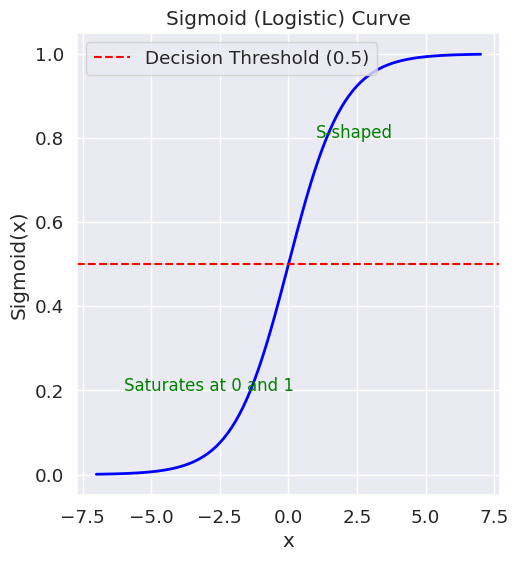

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-7, 7, 200)
y = sigmoid(x)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, y, color='blue', lw=2)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid (Logistic) Curve')
plt.grid(True)
plt.axhline(y=0.5, color='red', linestyle='--', label='Decision Threshold (0.5)')
plt.legend(loc='upper left')
plt.text(1, 0.8, 'S-shaped', fontsize=12, color='green')
plt.text(-6, 0.2, 'Saturates at 0 and 1', fontsize=12, color='green')


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}
logreg = LogisticRegression()

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train, Y_train)

Y_pred_best = best_logreg.predict(X_test)
classification_report_best = classification_report(Y_test, Y_pred_best)
print("Classification Report (Best Model):")
print(classification_report_best)

Best Hyperparameters: {'C': 10}
Classification Report (Best Model):
              precision    recall  f1-score   support

          No       0.83      0.86      0.84      1033
         Yes       0.57      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407

